# Lending Club Case Study 

Business Objective : 
    The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.The company can utilise this knowledge for its portfolio and risk assessment. 

In [41]:
#Import the data 

import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import style

In [205]:
loan = pd.read_csv(r'C:\Users\Mayank1\Downloads\loan (1)\loan.csv')
loan.head()

C:\Users\Mayank1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3> Data Cleaning

In [206]:
#By looking at the header some of the columns are having NaN values. The column having more than 80% NaN value does not
#give better insight. we should remove the columns wich have more than 80 percent of NaN values. 

loan = loan[ loan.columns[loan.isnull().mean() < 0.8]]

In [207]:
#Checking the Info

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [208]:
#By looking at header we find that some columns have single value in entire data set. 
#We should remove them.

nunique = loan.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index

In [209]:
cols_to_drop

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [210]:
#Drop the columns having single value
loan.drop(columns=cols_to_drop, inplace=True)

In [211]:
#Check the loan info 

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [212]:
#Some columns like 'member_id','emp_title','url','desc','title','zip_code' are irrelevent for case study 
#We should remove them 

irlvent_cols= ['member_id','emp_title','url','desc','title','zip_code']

loan.drop(columns=irlvent_cols, inplace=True)

In [213]:
#Check the info 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

<h3> Data Treatment

In [214]:
#There are few column which has value should be treated to get better inghts 

#Loan Interst Rate is having % symbol, we should remove it.

loan['int_rate']= loan.int_rate.apply(lambda x : x[ : -1])
loan['int_rate'] = loan.int_rate.astype('float')

In [215]:
# Get the the employee lenght Range from emp_lenght column to get better inghts
loan['emp_length_range']=loan.emp_length.str.extract('(\d+)')

In [216]:
loan[['emp_length', 'emp_length_range']]

,emp_length,emp_length_range
0,10+ years,10
1,< 1 year,1
2,10+ years,10
3,10+ years,10
4,1 year,1
...,...,...
39712,4 years,4
39713,3 years,3
39714,< 1 year,1
39715,< 1 year,1


In [217]:
#From the issue_d (issue date) get the issue year 
loan['issue_year'] = loan.issue_d.apply(lambda x : '20'+ x[ 4: ])

In [218]:
loan.issue_year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 39717, dtype: object

<h3> Univariate Analysis 

<h4> Univariate Analysis of Loan characteristics - Ordered Quantative Variables


In [219]:
#Get the Loan Variables on a seperate Data Frame 
loan_variables = loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','loan_status']]

In [220]:
#Check the details of all type of loan
loan_variables.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874
min,500.000000,500.000000,0.000000,5.420000,15.690000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000


In [221]:
#Check the details of charged off loan

loan_variables[(loan_variables.loan_status=='Charged Off')].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000
mean,12104.385108,11753.398792,10864.521324,13.820432,336.175006
std,8085.732038,7760.516335,7661.750540,3.654413,217.051841
min,900.000000,900.000000,0.000000,5.420000,22.790000
25%,5600.000000,5575.000000,5000.000000,11.310000,168.555000
50%,10000.000000,10000.000000,9401.209477,13.610000,293.870000
75%,16500.000000,16000.000000,15000.000000,16.400000,457.840000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000


In [222]:
#Observations :
#By Comparing the both the tables we can clearly see below thing:

#The mean of the interset rate is higher on charged off loan that could be a deciding factor
# The mean of installments is also higher, the installments are higher obviously because of interst rate


<h4>Univariate Analysis of Borrower's characteristics  - Ordered Quantative Variables

In [223]:
#Get the Borrower's Variable on a separate frame 

borrowers_variables= loan[['annual_inc','delinq_2yrs','installment','loan_status','revol_bal','revol_util','total_pymnt','total_rec_int','total_rec_late_fee']]

In [224]:
#Check the details of all the type of loan 

borrowers_variables.describe()

,annual_inc,delinq_2yrs,installment,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.896893e+04,0.146512,324.561922,13382.528086,12153.596544,2263.663172,1.363015
std,6.379377e+04,0.491812,208.874874,15885.016641,9042.040766,2608.111964,7.289979
min,4.000000e+03,0.000000,15.690000,0.000000,0.000000,0.000000,0.000000
25%,4.040400e+04,0.000000,167.020000,3703.000000,5576.930000,662.180000,0.000000
50%,5.900000e+04,0.000000,280.220000,8850.000000,9899.640319,1348.910000,0.000000
75%,8.230000e+04,0.000000,430.780000,17058.000000,16534.433040,2833.400000,0.000000
max,6.000000e+06,11.000000,1305.190000,149588.000000,58563.679930,23563.680000,180.200000


In [225]:
#Check the details of charged off loan
borrowers_variables[(borrowers_variables.loan_status=='Charged Off')].describe()

,annual_inc,delinq_2yrs,installment,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee
count,5.627000e+03,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000
mean,6.242730e+04,0.170606,336.175006,13514.243647,6838.030941,2194.459385,4.291692
std,4.777601e+04,0.534986,217.051841,15164.117475,6615.858854,2551.973930,12.815790
min,4.080000e+03,0.000000,22.790000,0.000000,0.000000,0.000000,0.000000
25%,3.700000e+04,0.000000,168.555000,3968.000000,2215.575000,555.010000,0.000000
50%,5.300000e+04,0.000000,293.870000,9211.000000,4839.000000,1288.260000,0.000000
75%,7.500000e+04,0.000000,457.840000,17518.000000,9191.705000,2801.615000,0.000000
max,1.250000e+06,8.000000,1305.190000,148829.000000,51745.450000,22122.300000,180.200000


In [226]:
#Observations 

#1. mean of total recevied late fee is higher in charged off loan - which is obvious. But does not imply for deciding factor
#2. mean of annual income is low for charged off loan 
#3. mean for delinq_2yrs is higher in charged off loan
#4. mean of revolving balance is higher for charged off loans


<h4>Univariate Analysis   - Categorical Variables

In [227]:
#Check the loan status 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

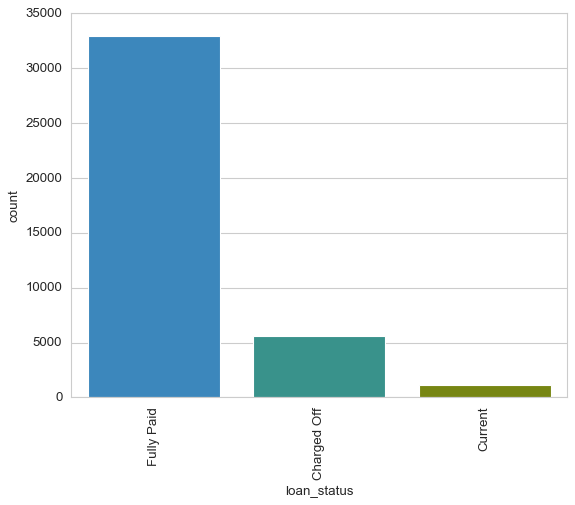

In [228]:
sn.set_style('whitegrid')
plt.figure(figsize = (8,6))
sn.countplot(loan['loan_status'])
plt.xticks(rotation=90)

In [229]:
#Since the loan status = 'Current' is not relevant for our analysis, hence removing it

loan= loan[~(loan['loan_status']=='Current')]

In [230]:
## ASSIGNING NUMERIC VALUES TO TARGET COLUMN
loan['loan_status']=loan['loan_status'].replace({'Charged Off':1,'Fully Paid':0})
loan['loan_status']

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 38577, dtype: int64

In [231]:
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [232]:
#Check the issue year 
loan.issue_year.value_counts()


2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

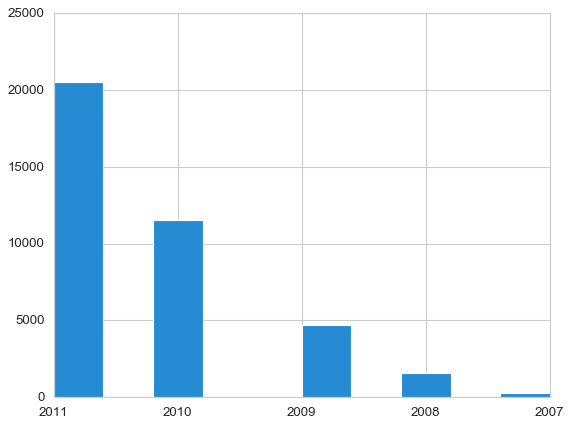

In [233]:
#Histogram shows that the number of loan given increasing which respect to year.
plt.figure(figsize = (8,6))
loan.issue_year.hist()

In [234]:
loan.emp_length_range.value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length_range, dtype: int64

Text(0, 0.5, 'count')

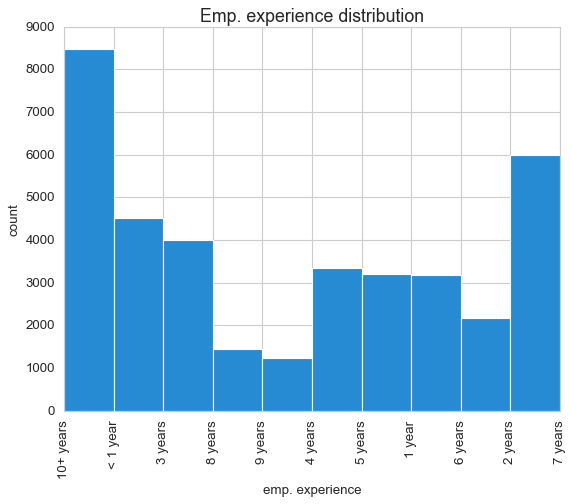

In [237]:
plt.figure(figsize = (8,6))
loan.emp_length.hist()
plt.xticks(rotation=90)
plt.xlabel('emp. experience')
plt.title('Emp. experience distribution')
plt.ylabel('count')

##  Multivariate analysis on categorical columns with charged off loan status

In [35]:
## NEW DATAFRAME WITH ONLY THE CHARGED OFF LOANS
loan_charged_off = loan[loan['loan_status']==1]

<h4> Check the type of grades contributing towards Charged off loans

In [36]:
df= loan_charged_off.groupby(['issue_year','grade'])[['loan_status']].count().unstack()
df

loan_status                                         
grade                A      B      C      D      E      F     G
issue_year                                                     
2007               1.0    8.0   14.0   15.0    5.0    2.0   NaN
2008              17.0   74.0   78.0   54.0   12.0   10.0   2.0
2009              79.0  156.0  176.0  113.0   51.0   11.0   8.0
2010             133.0  402.0  365.0  302.0  186.0   72.0  25.0
2011             372.0  785.0  714.0  634.0  461.0  224.0  66.0

In [56]:
?style.available

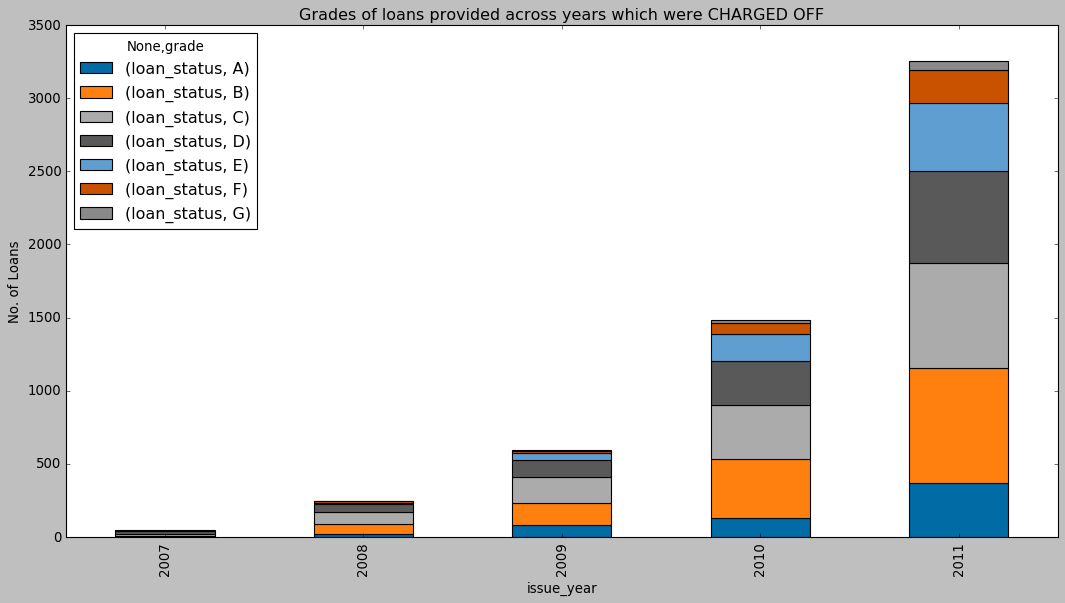

In [61]:
df.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Grades of loans provided across years which were CHARGED OFF')
plt.style.use('Solarize_Light2')
plt.ylabel('No. of Loans')
plt.show()

In [69]:
### GRADE B TYPE OF LOAN IS THE HIGHEST CONTRIBUTOR TOWARDS CHARGED OFF LOANS EVERY YEAR

<h4> Different TERMS of loans provided across years for charged off

In [62]:
df = loan_charged_off.groupby(['issue_year','term'])[['loan_status']].count().unstack()
df

loan_status           
term         36 months  60 months
issue_year                       
2007              45.0        NaN
2008             247.0        NaN
2009             594.0        NaN
2010             842.0      643.0
2011            1499.0     1757.0

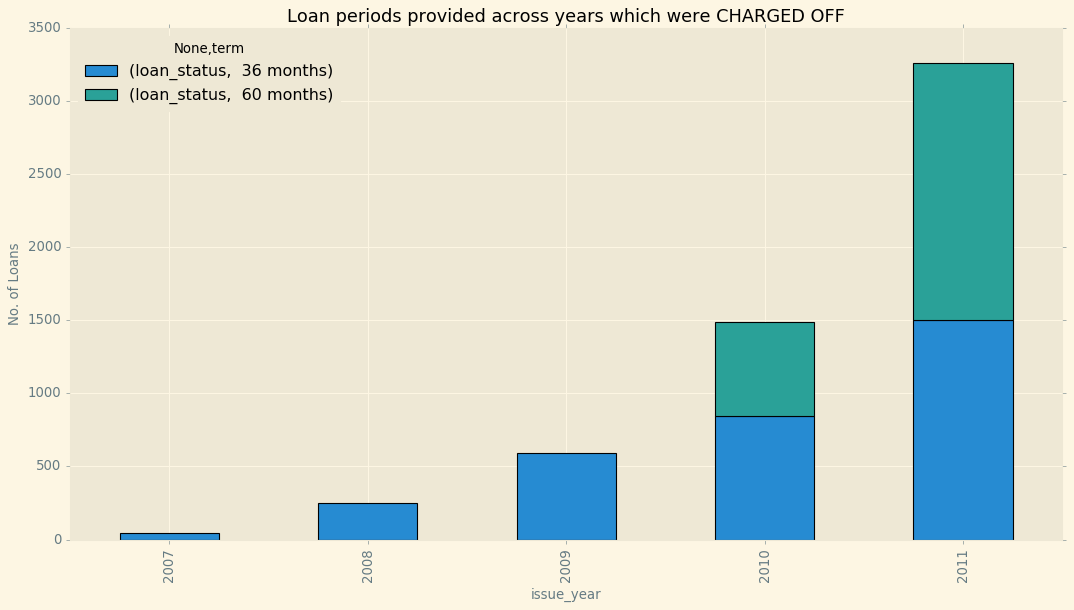

In [63]:
df.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Loan periods provided across years which were CHARGED OFF')
plt.ylabel('No. of Loans')
plt.style.use('Solarize_Light2')
plt.show()

In [73]:
## LOANS PROVIDED FOR 60 MONTHS CONTRIBUTED MORE TOWARDS CHARGED OFF LOANS IN 2011

<h4> VERIFICATION STATUS of loans across years which were charged off

In [64]:
loan_charged_off['verification_status'] = loan_charged_off['verification_status'].replace({'Source Verified':'Verified'})
## ASSUMPTION IS WHENEVR THE INCOME IS VERIFIED, THE SOURCE IS VERIFIED AUTOMATICALLY, FOR EX. LOOKING AT THE COMPANY PAY SLIPS

C:\Users\Mayank1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df = loan_charged_off.groupby(['issue_year','verification_status'])[['loan_status']].count().unstack()
df

loan_status         
verification_status Not Verified Verified
issue_year                               
2007                        45.0      NaN
2008                       199.0     48.0
2009                       354.0    240.0
2010                       650.0    835.0
2011                       894.0   2362.0

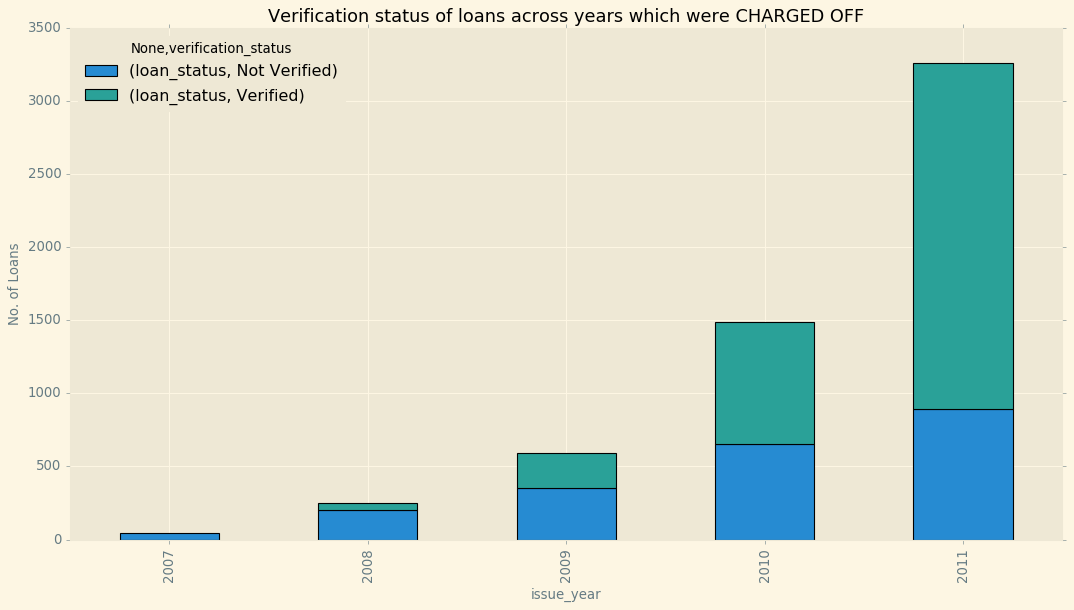

In [66]:
df.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Verification status of loans across years which were CHARGED OFF')
plt.ylabel('No. of Loans')
plt.style.use('Solarize_Light2')
plt.show()

In [67]:
## MAJORITY OF THE CHARGED OFF LOANS IN 2011 WERE VERIFIED BEFORE, SUGGESTING A RELOOK AT THE VERIFICATION PROCESS

<h4> PURPOSE of Loan taken across years which were charged off

In [68]:
df = loan_charged_off.groupby(['issue_year','purpose'])[['loan_status']].count().unstack()
df

loan_status                                             \
purpose            car credit_card debt_consolidation educational   
issue_year                                                          
2007               NaN         2.0               15.0         2.0   
2008               7.0        36.0              105.0        11.0   
2009              19.0        48.0              244.0        24.0   
2010              36.0       132.0              704.0        19.0   
2011              98.0       324.0             1699.0         NaN   

                                                                        \
purpose    home_improvement house major_purchase medical moving  other   
issue_year                                                               
2007                    4.0   NaN            1.0     NaN    3.0    6.0   
2008                   14.0   1.0            9.0     2.0    NaN   34.0   
2009                   39.0  12.0           21.0    15.0    6.0   80.0   
2010                   96.0  16.0           88.0    27.0   24.0  185.0   
2011                  194.0  30.0          103.0    62.0   59.0  328.0   

                                                             
purpose    renewable_energy small_business vacation wedding  
issue_year                                                   
2007                    NaN           10.0      NaN     2.0  
2008                    NaN           25.0      NaN     3.0  
2009                    NaN           68.0      3.0    15.0  
2010                    9.0          108.0     22.0    19.0  
2011                   10.0          264.0     28.0    57.0

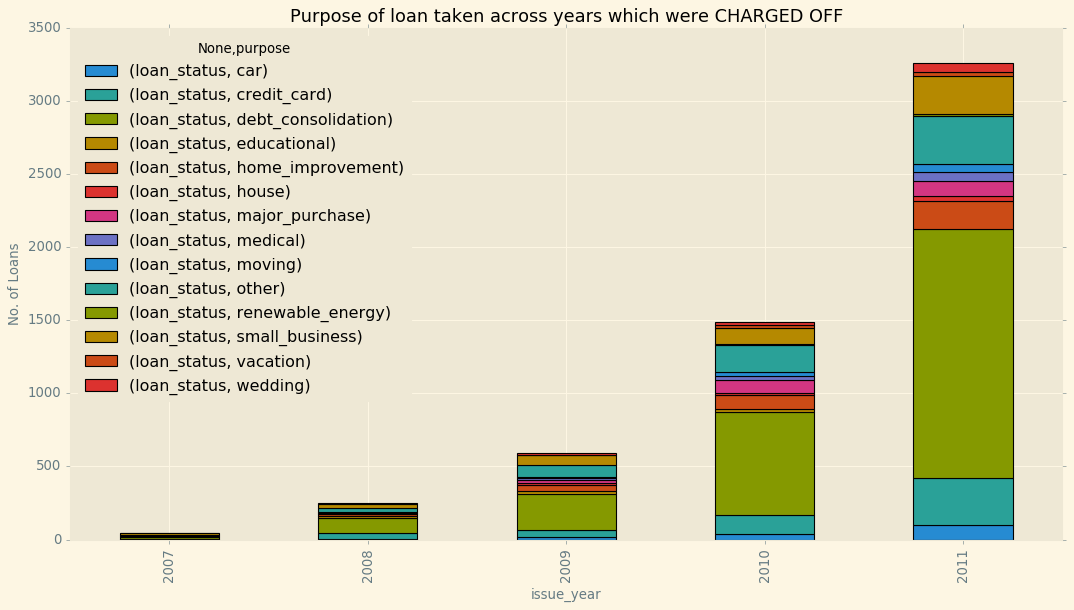

In [69]:
df.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Purpose of loan taken across years which were CHARGED OFF')
plt.ylabel('No. of Loans')
plt.style.use('Solarize_Light2')
plt.show()

In [70]:
## ALTHOUGH DEBT CONSOLIDATION WAS THE HIGHEST CONTRIBUTOR , THE NO. OF LOANS TAKEN FOR DEBT CONSOLIDATION WAS MUCH HIGHER THAN THE AVERAGE OF ALL PURPOSE OF LOANS

## FOLLOWING THAT, THE SMALL BUSINESSES , CREDIT CARD AND OTHER TYPE OF LOANS WERE THE MAJOR DEFAULTERS

#### Emp. length of Borrowers whose loans were charged off 

In [71]:
df = loan_charged_off.groupby(['issue_year','emp_length'])[['loan_status']].count().unstack()
df

loan_status                                                    \
emp_length      1 year 10+ years 2 years 3 years 4 years 5 years 6 years   
issue_year                                                                 
2007               8.0       7.0     4.0     2.0     3.0     NaN     2.0   
2008              37.0      56.0    24.0    14.0    23.0    14.0    13.0   
2009              73.0      95.0    79.0    54.0    60.0    36.0    18.0   
2010             107.0     326.0   173.0   177.0   124.0   125.0    66.0   
2011             231.0     847.0   287.0   308.0   252.0   283.0   208.0   

                                             
emp_length 7 years 8 years 9 years < 1 year  
issue_year                                   
2007           2.0     2.0     2.0     13.0  
2008          10.0     8.0     4.0     44.0  
2009          26.0    22.0    21.0    110.0  
2010          68.0    46.0    43.0    156.0  
2011         157.0   125.0    88.0    316.0

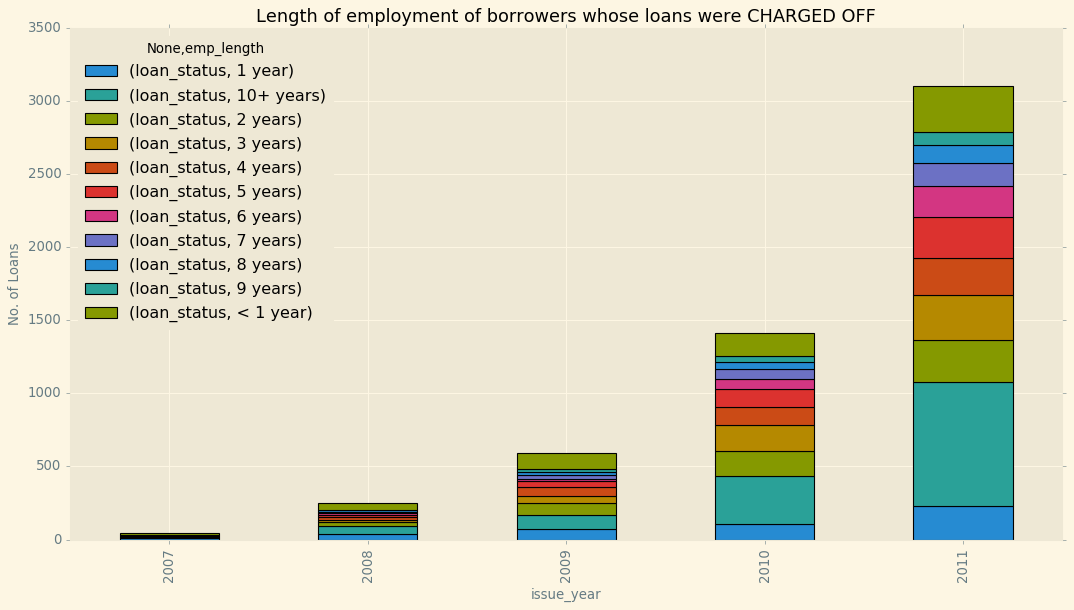

In [72]:
df.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Length of employment of borrowers whose loans were CHARGED OFF')
plt.ylabel('No. of Loans')
plt.style.use('Solarize_Light2')
plt.show()

In [73]:
## ALTHOUGH BORROWERS WITH MORE THAN 10 YEARS EXPERICEN WERE THE MAJOR DEFAULTERS, THEIR AVERAGE NO. WAS ALSO HIGHER FOR THE NO. OF LOANS TAKEN

## THE ONES THAT FOLLOW ARE LESS THAN ONE YEAR OF EXPERIENCE AND 3 YEARS OF EXPERINCE WHO WERE THE MAJOR DEFAULTERS

<h4> STATEWISE distribution of Loan taken across years which were charged off

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

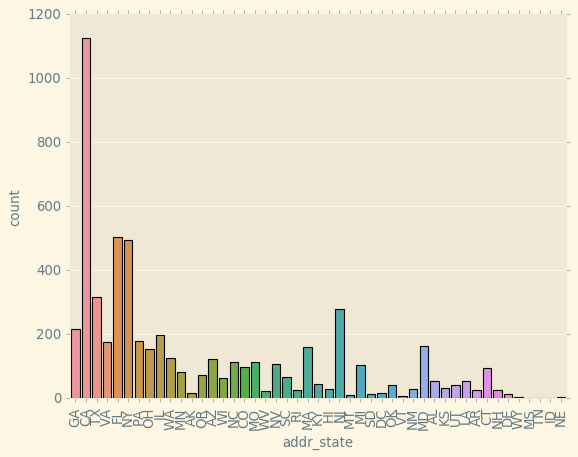

In [74]:
sn.countplot(loan_charged_off['addr_state'])
plt.xticks(rotation=90)

In [75]:
df = loan_charged_off.groupby(['issue_year','addr_state'])[['loan_status']].count().unstack()
df

loan_status                                                        \
addr_state          AK    AL    AR    AZ     CA    CO    CT   DC   DE     FL   
issue_year                                                                     
2007               NaN   NaN   NaN   NaN    2.0   2.0   NaN  NaN  NaN   10.0   
2008               NaN   3.0   NaN  10.0   60.0   8.0   4.0  2.0  2.0   33.0   
2009               2.0   5.0   4.0  18.0  129.0  12.0   9.0  4.0  2.0   56.0   
2010               3.0  14.0   8.0  24.0  297.0  35.0  23.0  1.0  4.0  119.0   
2011              10.0  32.0  15.0  71.0  637.0  41.0  58.0  8.0  4.0  286.0   

            ...                                                            
addr_state  ...   SD   TN     TX    UT     VA   VT    WA    WI    WV   WY  
issue_year  ...                                                            
2007        ...  NaN  NaN    NaN   NaN    2.0  NaN   1.0   NaN   NaN  NaN  
2008        ...  NaN  2.0   10.0   6.0    6.0  NaN   7.0   NaN   NaN  NaN  
2009        ...  1.0  NaN   35.0   6.0   18.0  1.0  14.0   5.0   3.0  NaN  
2010        ...  3.0  NaN   92.0  10.0   48.0  1.0  35.0  23.0   6.0  1.0  
2011        ...  8.0  NaN  179.0  18.0  103.0  4.0  70.0  35.0  12.0  3.0  

[5 rows x 47 columns]

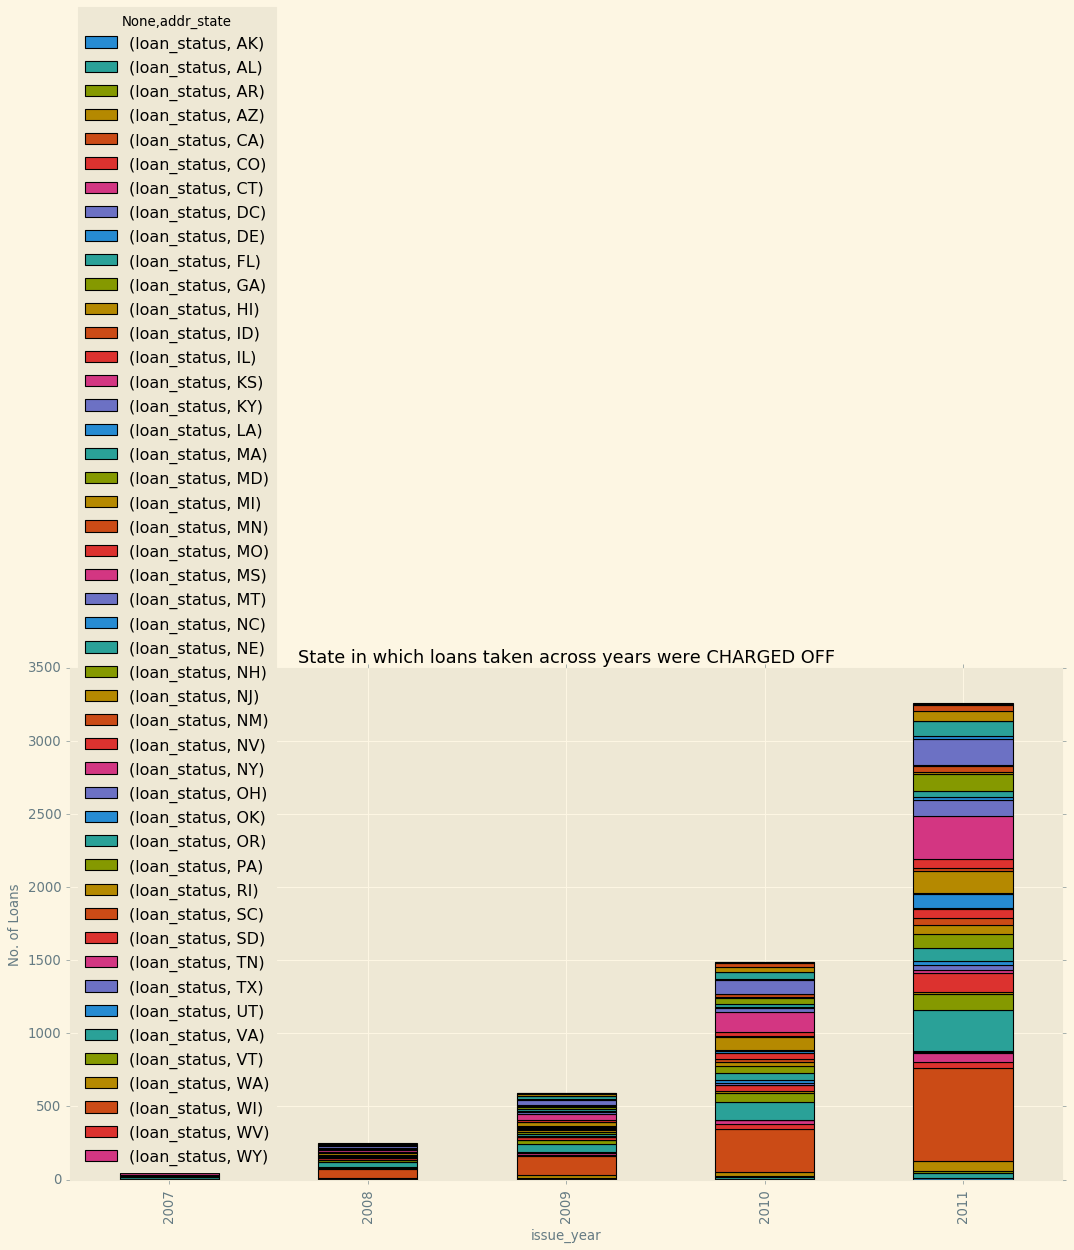

In [77]:
df.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('State in which loans taken across years were CHARGED OFF')
plt.ylabel('No. of Loans')
plt.style.use('Solarize_Light2')
plt.show()

In [90]:
## CALIFORNIA HAS A MUCH HIGHER AVERAGE NO. OF LOANS TAKEN THAN THE REST OF STATES, HENCE MORE NO. OF DEFAULTERS

## AFTER THAT, THE STATES OF NEW YORK AND FLORIDA SHOW THE HIGHEST NO. OF DEFAULTERS

<h4> HOME OWNERSHIP of Loan taken across years which were charged off

In [78]:
df = loan_charged_off.groupby(['issue_year','home_ownership'])[['loan_status']].count().unstack()
df

loan_status                     
home_ownership    MORTGAGE OTHER    OWN    RENT
issue_year                                     
2007                  21.0   NaN    4.0    20.0
2008                 109.0   2.0   14.0   122.0
2009                 211.0  13.0   43.0   327.0
2010                 601.0   2.0  127.0   755.0
2011                1385.0   1.0  255.0  1615.0

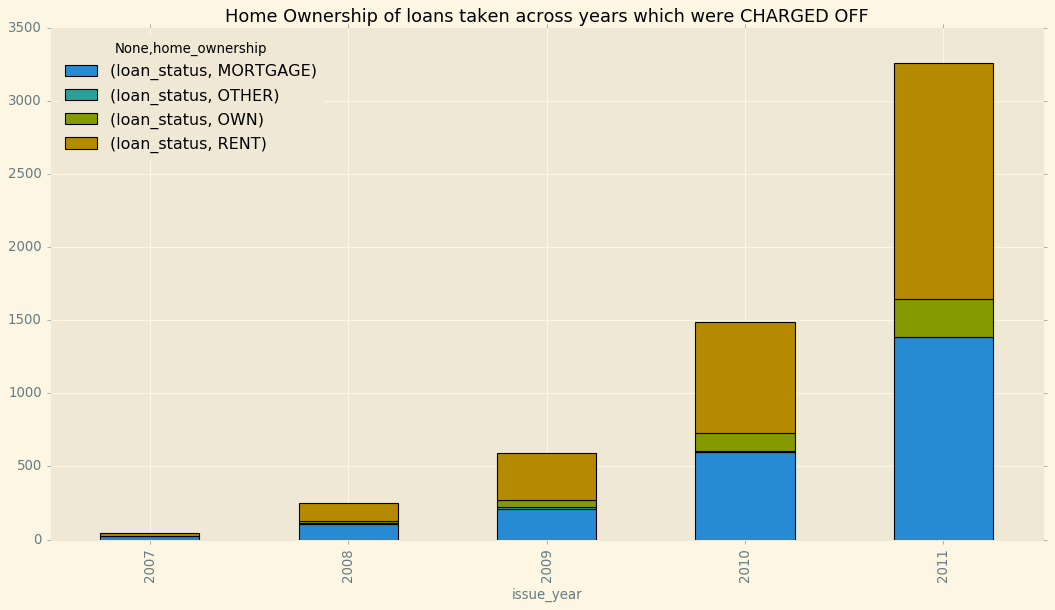

In [79]:
df.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Home Ownership of loans taken across years which were CHARGED OFF')
plt.show()

In [94]:
## MORTGAGE AND RENT BOTH CONTRIBUTE EQUALLY TOWARDS CHARGED OFF LOANS

<h4>INQUIRIES IN LAST 6 MONTHS of Loan taken across years which were charged off

In [80]:
df = loan_charged_off.groupby(['issue_year','inq_last_6mths'])[['loan_status']].count().unstack()
df

loan_status                                                
inq_last_6mths           0      1      2      3     4     5    6    7    8
issue_year                                                                
2007                  10.0   11.0   11.0   11.0   NaN   2.0  NaN  NaN  NaN
2008                  81.0   79.0   45.0   36.0   3.0   NaN  1.0  1.0  1.0
2009                 219.0  183.0   89.0   76.0  13.0   7.0  4.0  3.0  NaN
2010                 602.0  414.0  246.0  191.0  13.0  11.0  5.0  3.0  NaN
2011                1368.0  990.0  552.0  305.0  22.0   8.0  6.0  3.0  2.0

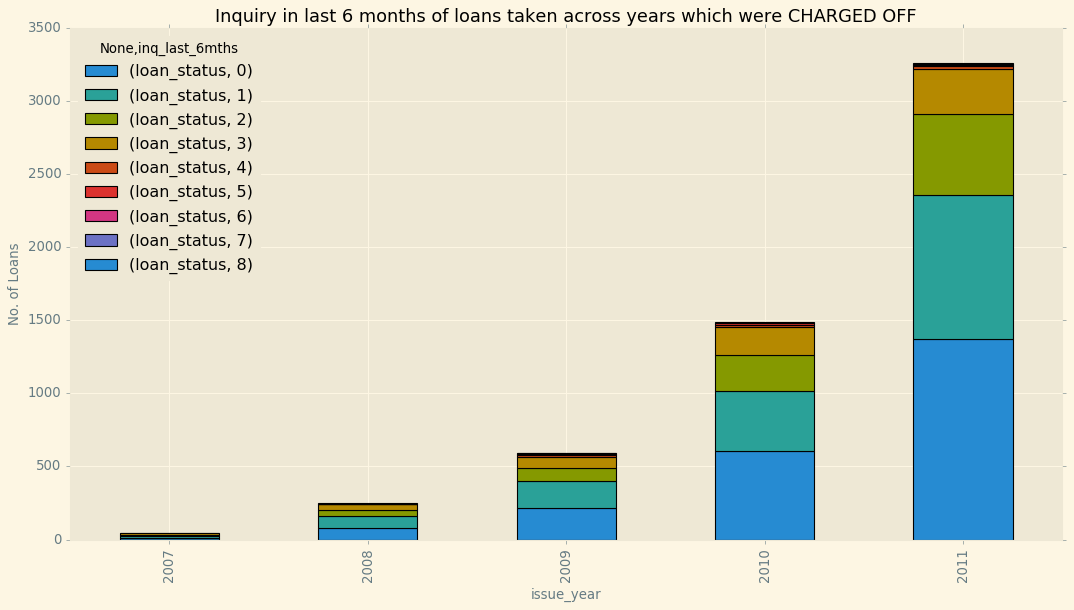

In [81]:
df.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Inquiry in last 6 months of loans taken across years which were CHARGED OFF')
plt.ylabel('No. of Loans')
plt.style.use('Solarize_Light2')
plt.show()

In [98]:
## MOST OF THE LOANS WHICH WERE CHARGED OFF HAD NO INQUIRIES

<h4> Analysing effect of Loan Amount on Loan Status

In [82]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [100]:
?sn.set_style

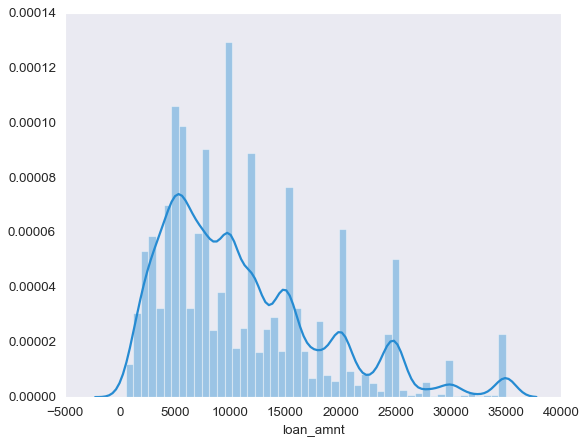

In [102]:
sn.distplot(loan['loan_amnt'])
sn.set_style('whitegrid')
plt.show()

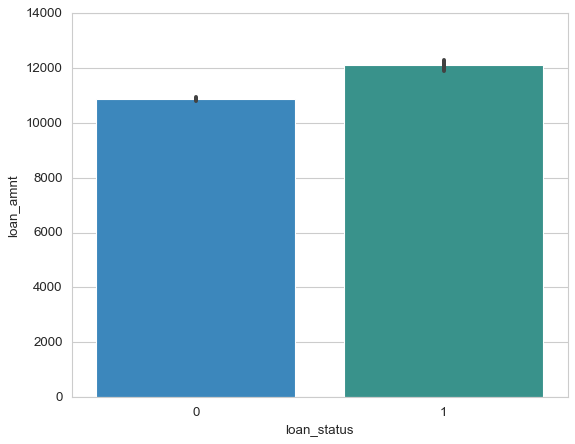

In [103]:
sn.barplot(loan['loan_status'],loan['loan_amnt'])
sn.set_style('whitegrid')
plt.show()

In [87]:
loan['loan_status'].corr(loan['loan_amnt'])
## ONLY A 6 PERCENT CORRELATION

0.05946259687631779

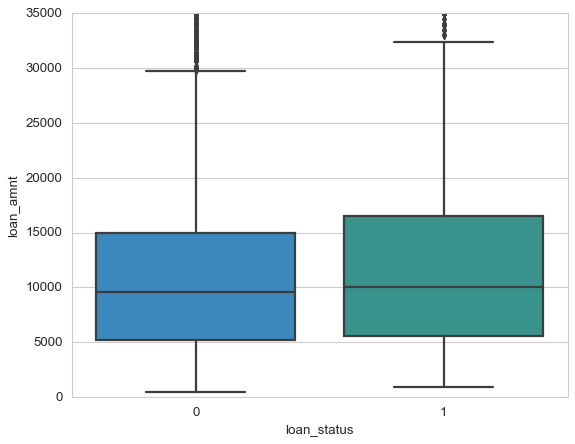

In [104]:
sn.boxplot(loan['loan_status'],loan['loan_amnt'])
sn.set_style('whitegrid')
plt.show()

### Analysing effect of Emp Length on Loan Status

In [114]:
loan['emp_length_range'].value_counts()

10.0    8488
1.0     7677
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length_range, dtype: int64

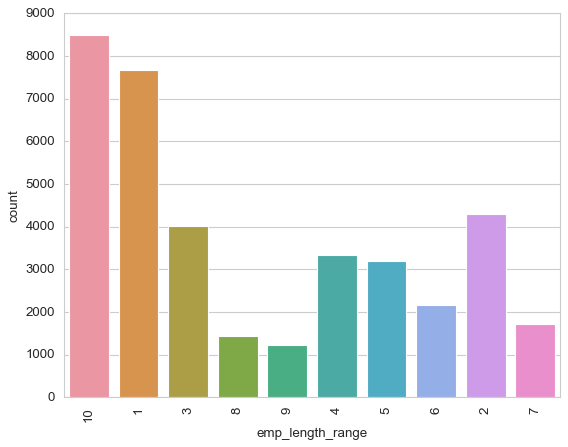

In [109]:
sn.countplot(loan['emp_length_range'])
plt.xticks(rotation=90)
sn.set_style('whitegrid')
plt.show()

In [112]:
loan['emp_length_range'] = loan['emp_length_range'].astype('float64')

In [113]:
loan['emp_length_range'].corr(loan['loan_status'])
## NO CORRELATION

0.016655646522899865

<h4> Plotting a heatmap of variables studied so far

In [115]:
df = loan[['loan_status','loan_amnt','emp_length_range']]

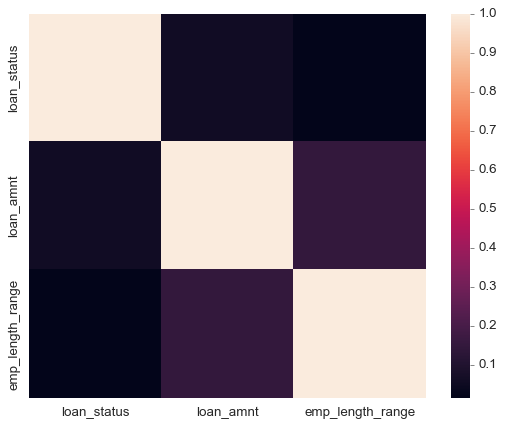

In [116]:
sn.heatmap(df.corr())

### Analysing effect of Inquiry last 6 months on Loan Status

In [117]:
loan['inq_last_6mths']

0        1
1        5
2        2
3        1
5        3
        ..
39712    0
39713    1
39714    0
39715    0
39716    0
Name: inq_last_6mths, Length: 38577, dtype: int64

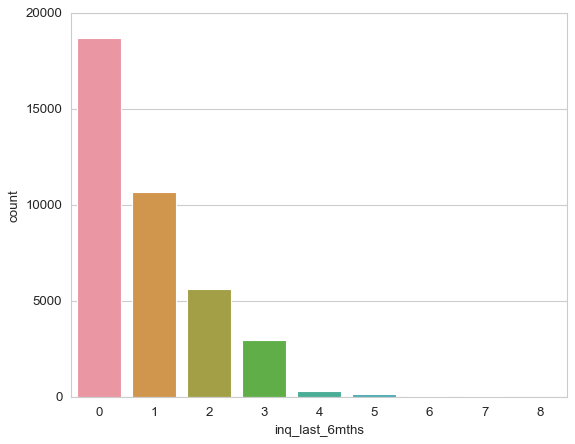

In [118]:
sn.countplot(loan['inq_last_6mths'])

In [119]:
loan['loan_status'].corr(loan['inq_last_6mths'])
## 7 PERCENT CORRELATION

0.07187780396397483

### Analysing effect of Delinq 2Yrs on Loan Status

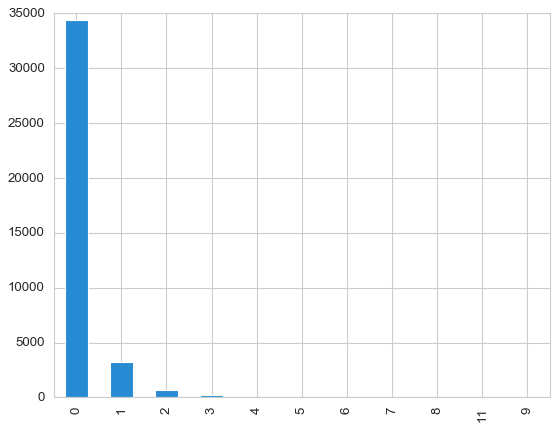

In [120]:
loan['delinq_2yrs'].value_counts().plot.bar()

In [121]:
loan['loan_status'].corr(loan['delinq_2yrs'])
## ONLY A 2 PERCENT CORRELATION

0.020095804856335876

### Analysing effect of Grade on Loan Status

In [238]:
loan['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

Text(0.5, 1.0, 'Grades of loan taken')

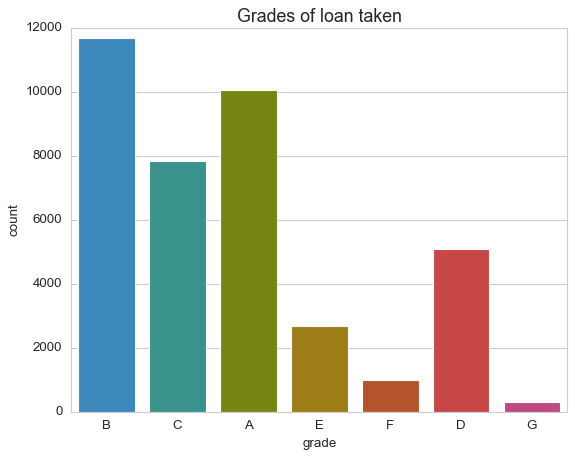

In [240]:
sn.countplot(loan['grade'])
plt.title('Grades of loan taken')

In [124]:
le = LabelEncoder()
loan['grade']=le.fit_transform(loan['grade'])
loan['grade']

0        1
1        2
2        2
3        2
5        0
        ..
39712    0
39713    2
39714    0
39715    0
39716    4
Name: grade, Length: 38577, dtype: int32

In [125]:
loan['loan_status'].corr(loan['grade'])
## SHOWS CORRELATION OF 20 PERCENT

0.2018690527800796

### Analysing effect of State Address on Loan Status

In [241]:
loan['addr_state']

0        AZ
1        GA
2        IL
3        CA
5        AZ
         ..
39712    CO
39713    NC
39714    MA
39715    MD
39716    MA
Name: addr_state, Length: 38577, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

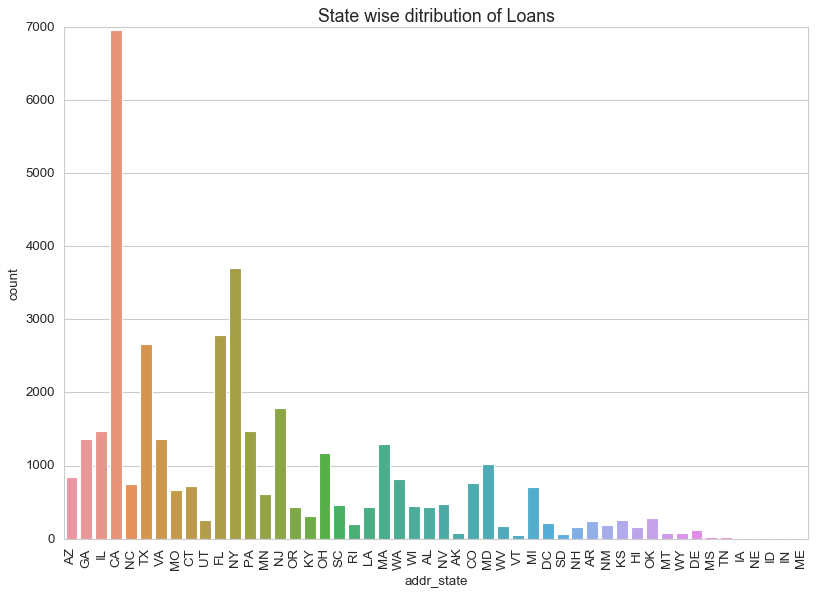

In [245]:
plt.figure(figsize=(12,8))
sn.countplot(loan['addr_state'])
plt.title('State wise ditribution of Loans')
plt.xticks(rotation=90)

In [128]:
le = LabelEncoder()
loan['addr_state']=le.fit_transform(loan['addr_state'])
loan['addr_state']

0         3
1        10
2        14
3         4
5         3
         ..
39712     5
39713    27
39714    19
39715    20
39716    19
Name: addr_state, Length: 38577, dtype: int32

In [130]:
loan['loan_status'].corr(loan['addr_state'])
## NO EFFECT OF STATE ADDRESS ON LOAN STATUS

-0.023912134018867496

### Plotting a heatmap of variables studied so far

In [131]:
df2 = loan[['loan_status','addr_state','grade','loan_amnt','emp_length']]

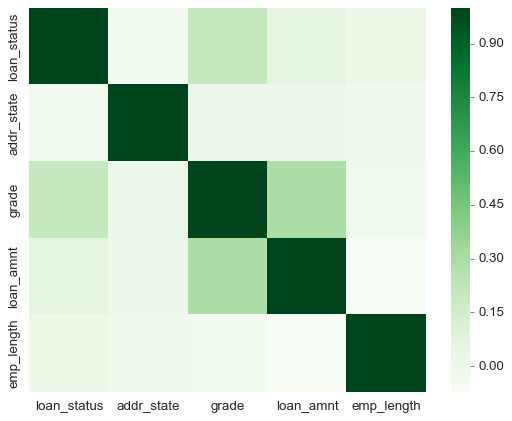

In [132]:
sn.heatmap(df2.corr(),cmap='Greens')

### Analysing effect of Sub Grade on Loan Status

In [133]:
loan['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

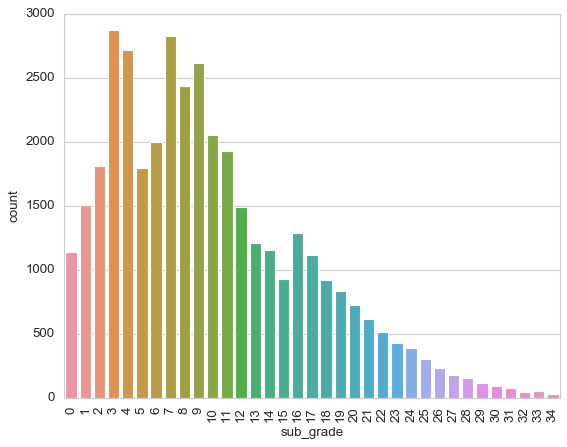

In [150]:
plt.figure(figsize=(8,6))
sn.countplot(loan['sub_grade'])
plt.xticks(rotation=90)

In [135]:
le = LabelEncoder()
loan['sub_grade']=le.fit_transform(loan['sub_grade'])
loan['sub_grade']

0         6
1        13
2        14
3        10
5         3
         ..
39712     3
39713    10
39714     3
39715     1
39716    21
Name: sub_grade, Length: 38577, dtype: int32

In [136]:
loan['loan_status'].corr(loan['sub_grade'])
## SHOWS CORRELATION OF 21 PERCENT

0.20532025448946134

### Analysing effect of Home Ownership on Loan Status

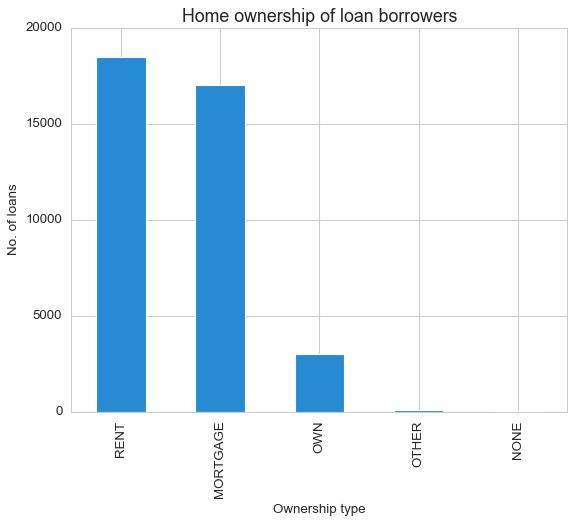

In [254]:
plt.figure(figsize=(8,6))
plt.title('Home ownership of loan borrowers')
plt.xlabel('Ownership type')
plt.ylabel('No. of loans')
loan['home_ownership'].value_counts().plot.bar()

In [138]:
le = LabelEncoder()
loan['home_ownership']=le.fit_transform(loan['home_ownership'])
loan['home_ownership']

0        4
1        4
2        4
3        4
5        4
        ..
39712    0
39713    4
39714    0
39715    0
39716    3
Name: home_ownership, Length: 38577, dtype: int32

In [139]:
loan['loan_status'].corr(loan['home_ownership'])
## NO EFFECT OF HOME OWNERSHIP ON LOAN STATUS

0.023099147531274903

### Analysing effect of Purpose on Loan Status

In [140]:
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

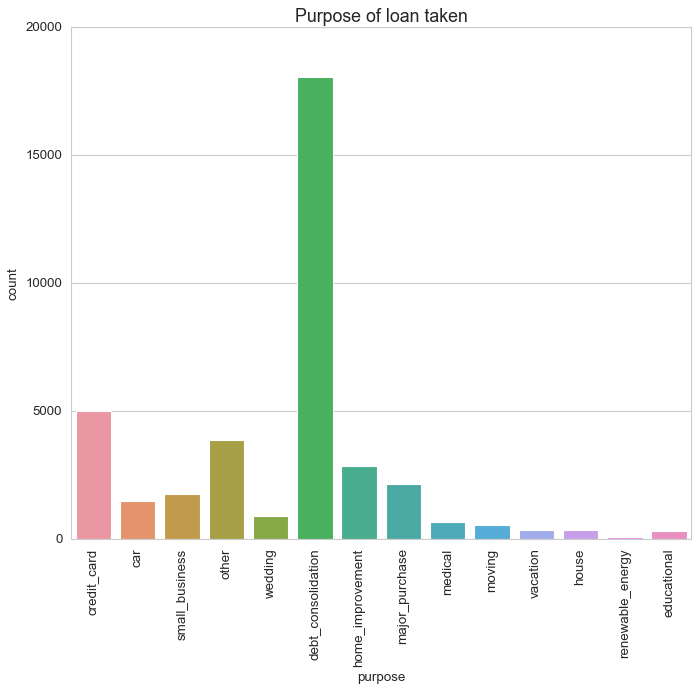

In [251]:
plt.figure(figsize=(10,8))
sn.countplot(loan['purpose'])
plt.title('Purpose of loan taken')
plt.xticks(rotation=90)

In [142]:
le = LabelEncoder()
loan['purpose']=le.fit_transform(loan['purpose'])
loan['purpose']

0         1
1         0
2        11
3         9
5        13
         ..
39712     4
39713     1
39714     2
39715     9
39716     2
Name: purpose, Length: 38577, dtype: int32

In [143]:
loan['loan_status'].corr(loan['purpose'])
## ONLY A 4 PERCENT CORRELATION BETWEEN PURPOSE OF LOAN AND LOAN STATUS

0.0418306599272047

### Analysing effect of Public Records on Loan Status

In [151]:
loan['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

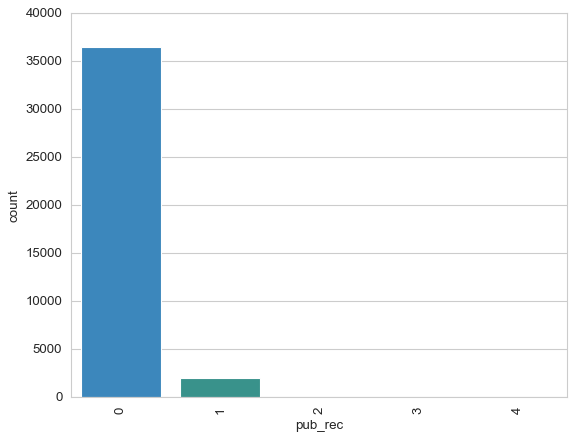

In [152]:
sn.countplot(loan['pub_rec'])
plt.xticks(rotation=90)

In [153]:
loan['loan_status'].corr(loan['pub_rec'])
## PUBLIC RECORDS SHOW ONLY A 5 PERCENT EFFECT ON LOAN STATUS

0.05100097807378793

### Analysing effect of Earliest credit line on Loan Status

In [154]:
loan['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 38577, dtype: object

In [155]:
loan['total_acc']

0         9
1         4
2        10
3        37
5        12
         ..
39712    40
39713     9
39714    20
39715    26
39716     8
Name: total_acc, Length: 38577, dtype: int64

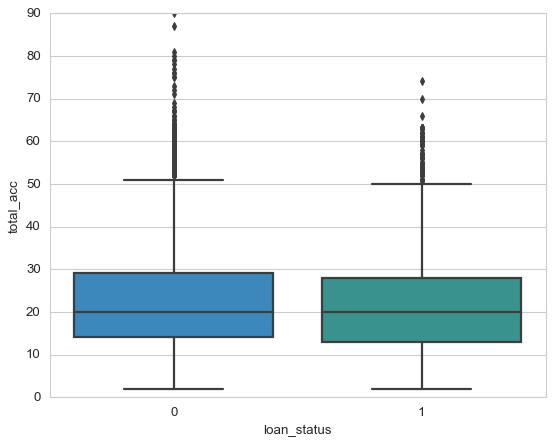

In [156]:
sn.boxplot(loan['loan_status'],loan['total_acc'])

In [157]:
loan['loan_status'].corr(loan['total_acc'])

-0.022607564499699796

### Analysing effect of Revol_bal on Loan Status

In [158]:
loan['revol_bal']

0        13648
1         1687
2         2956
3         5598
5         7963
         ...  
39712     7274
39713     8847
39714     9698
39715    85607
39716     4175
Name: revol_bal, Length: 38577, dtype: int64

In [159]:
loan['revol_bal'].describe()

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [160]:
loan[loan['revol_bal']>16912]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,emp_length_range,issue_year
6,1069639,7000,7000,7000.00000,60 months,15.96,170.08,2,14,8,...,3125.23,0.0,0.0,0.0,May-16,1313.76,May-16,0.0,8.0,2011
11,1069908,12000,12000,12000.00000,36 months,12.69,402.54,1,9,1,...,1947.99,0.0,0.0,0.0,Sep-13,6315.30,Aug-13,0.0,10.0,2011
16,1065775,10000,10000,10000.00000,36 months,15.27,347.98,2,13,4,...,2527.15,0.0,0.0,0.0,Jan-15,370.46,Apr-15,0.0,4.0,2011
17,1069971,3600,3600,3600.00000,36 months,6.03,109.57,0,0,1,...,185.27,0.0,0.0,0.0,May-13,583.45,May-14,0.0,10.0,2011
20,1069740,20250,20250,19142.16108,60 months,15.27,484.63,2,13,3,...,7429.05,0.0,0.0,0.0,Aug-15,6024.09,Mar-16,0.0,3.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39707,92666,5000,5000,525.00000,36 months,9.33,159.77,1,7,2,...,751.53,0.0,0.0,0.0,Jul-10,161.55,Jun-07,NaN,2.0,2007
39708,92552,5000,5000,375.00000,36 months,9.96,161.25,1,9,4,...,804.73,0.0,0.0,0.0,Jul-10,162.07,Jun-10,NaN,4.0,2007
39709,92533,5000,5000,675.00000,36 months,11.22,164.23,2,13,10,...,912.05,0.0,0.0,0.0,Jul-10,165.17,Jun-07,NaN,1.0,2007
39711,92402,5000,5000,700.00000,36 months,8.70,158.30,1,5,5,...,698.60,0.0,0.0,0.0,Jul-10,159.83,Nov-14,NaN,5.0,2007


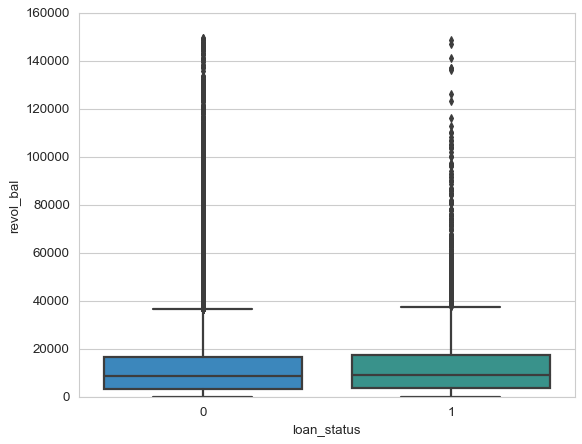

In [161]:
sn.boxplot(loan['loan_status'],loan['revol_bal'])

In [162]:
loan['loan_status'].corr(loan['revol_bal'])
## NO EFFECT OF REVOL BAL ON LOAN STATUS

0.00585386277497869

### Analysing effect of installment on Loan Status

In [163]:
loan['installment']

0        162.87
1         59.83
2         84.33
3        339.31
5        156.46
          ...  
39712     78.42
39713    275.38
39714    156.84
39715    155.38
39716    255.43
Name: installment, Length: 38577, dtype: float64

In [164]:
loan['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

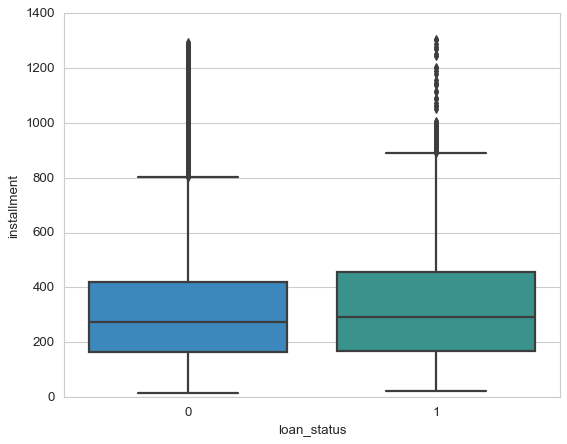

In [165]:
sn.boxplot(loan['loan_status'],loan['installment'])

In [166]:
loan['loan_status'].corr(loan['installment'])
## ONLY 3 PERCENT CORRELATION BETWEEN INSTALLMENT AMOUNT AND LOAN STATUS

0.027152907298031364

### Analysing effect of term on Loan Status

In [167]:
loan['term']

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38577, dtype: object

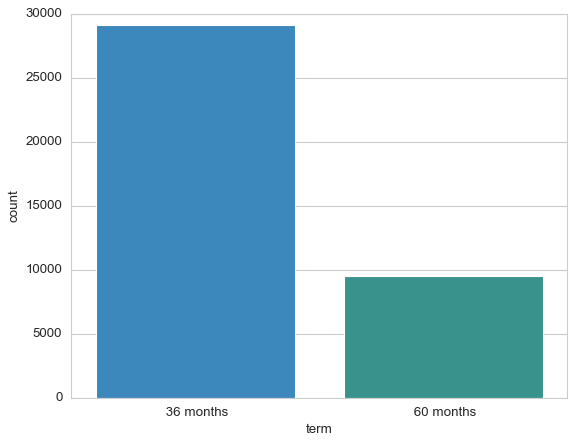

In [168]:
sn.countplot(loan['term'])

In [169]:
loan['term'] = loan['term'].astype(str)

In [170]:
loan['term'] = loan['term'].apply(lambda x:x[:3])
loan['term']

0         36
1         60
2         36
3         36
5         36
        ... 
39712     36
39713     36
39714     36
39715     36
39716     36
Name: term, Length: 38577, dtype: object

In [171]:
loan['term'] = loan['term'].astype('int64')

In [172]:
loan['loan_status'].corr(loan['term'])
## SHOWS CORRELATION

0.17348667770261705

### Analysing effect of Verification Status on Loan Status

In [173]:
loan['verification_status']

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
5        Source Verified
              ...       
39712       Not Verified
39713       Not Verified
39714       Not Verified
39715       Not Verified
39716       Not Verified
Name: verification_status, Length: 38577, dtype: object

In [174]:
loan['verification_status'] = loan['verification_status'].replace({'Source Verified':'Verified'})

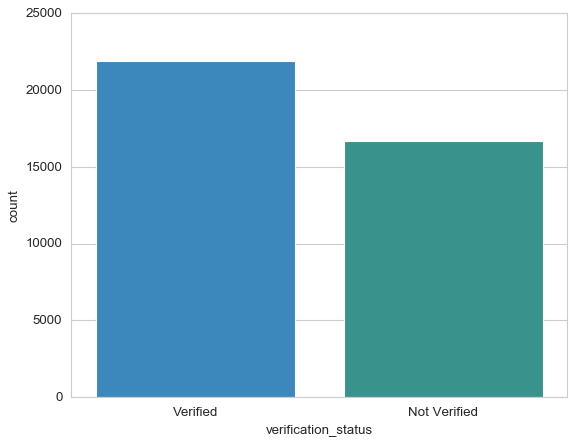

In [175]:
sn.countplot(loan['verification_status'])

In [176]:
le = LabelEncoder()
loan['verification_status']=le.fit_transform(loan['verification_status'])
loan['verification_status']

0        1
1        1
2        0
3        1
5        1
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: verification_status, Length: 38577, dtype: int32

In [177]:
loan['loan_status'].corr(loan['verification_status'])

0.04343887825407389

### Analysing effect of Recoveries on Loan Status

In [178]:
loan['recoveries']

0          0.00
1        117.08
2          0.00
3          0.00
5          0.00
          ...  
39712      0.00
39713      0.00
39714      0.00
39715      0.00
39716      0.00
Name: recoveries, Length: 38577, dtype: float64

In [179]:
loan['loan_status'].corr(loan['recoveries'])

0.3395616801677362

In [180]:
## ALTHOUGH THERE IS CORRELATION , IT CANNOT BE A PREDICTOR VARIABLE

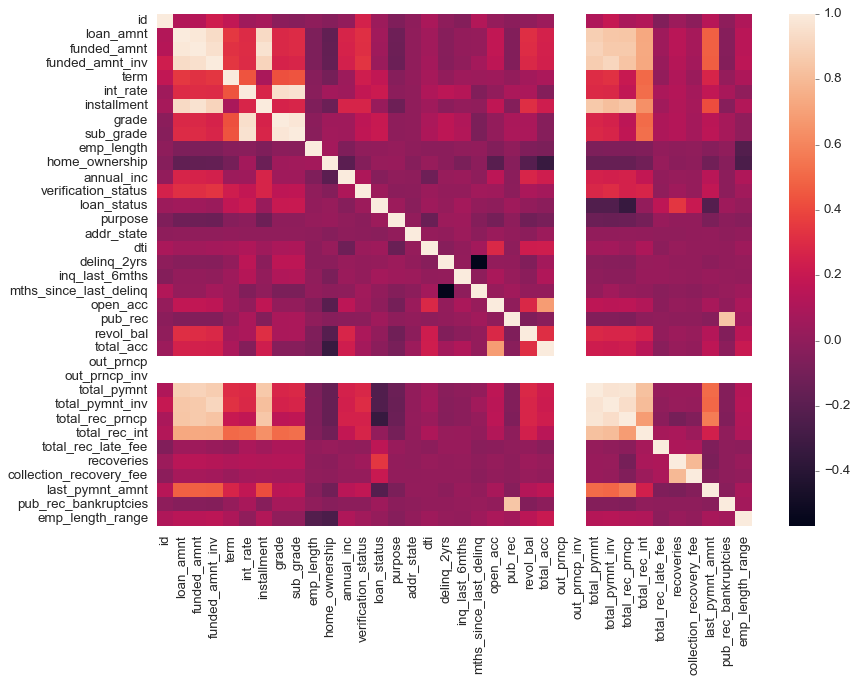

In [181]:
#Checking Complete Heat Map
plt.figure(figsize=(12,8))
sn.heatmap(loan.corr())
plt.show()

### Analysing effect of Issue Date on Loan Status

In [246]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 <a list of 55 Text xticklabel objects>)

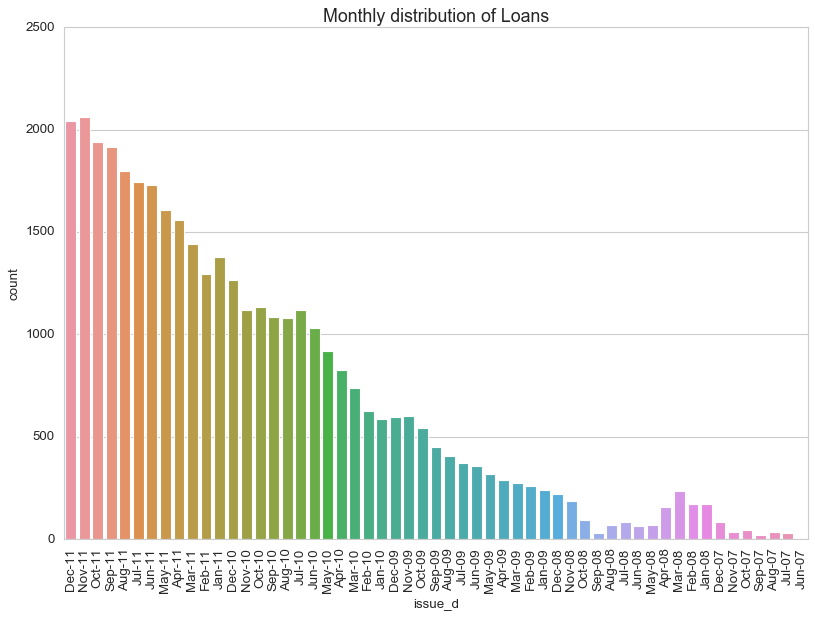

In [249]:
plt.figure(figsize=(12,8))
sn.countplot(loan['issue_d'])
plt.title('Monthly distribution of Loans')
plt.xticks(rotation=90)

In [187]:
le = LabelEncoder()
loan['issue_d']=le.fit_transform(loan['issue_d'])
loan['issue_d']

0        13
1        13
2        13
3        13
5        13
         ..
39712    22
39713    22
39714    22
39715    22
39716    27
Name: issue_d, Length: 38577, dtype: int64

In [188]:
loan['loan_status'].corr(loan['issue_d'])

0.017083478854194218

### Analysing effect of Pub_rec_Bankruptcies on Loan Status

In [189]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

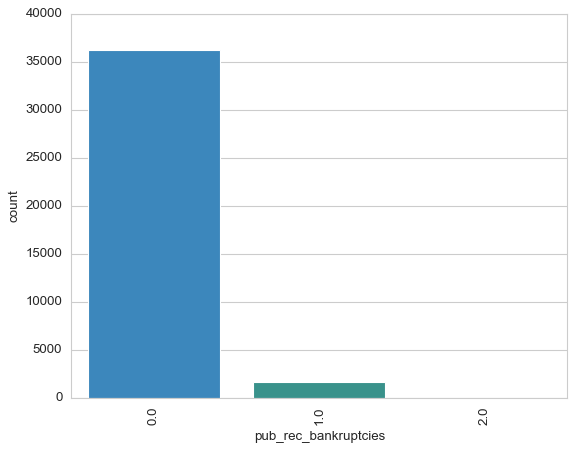

In [190]:
sn.countplot(loan['pub_rec_bankruptcies'])
plt.xticks(rotation=90)

In [191]:
loan['loan_status'].corr(loan['pub_rec_bankruptcies'])

0.04775729019594504

### Analysing effect of Interest Rate on Loan Status

In [192]:
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

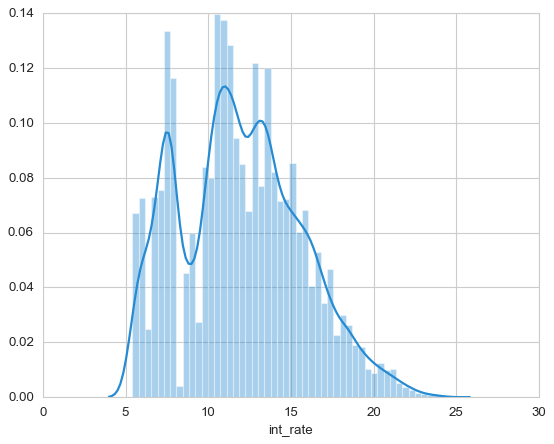

In [193]:
sn.distplot(loan['int_rate'])

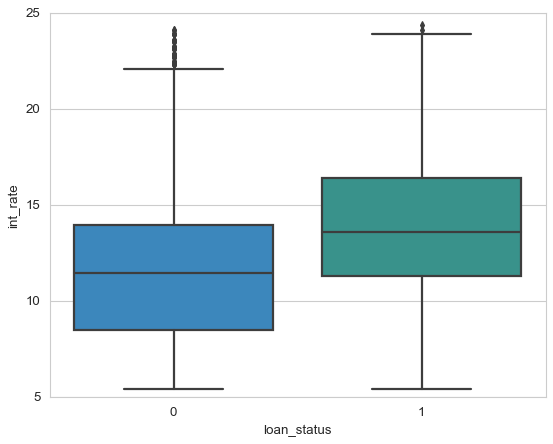

In [194]:
sn.boxplot(loan['loan_status'],loan['int_rate'])

In [195]:
loan['loan_status'].corr(loan['int_rate'])
## INTEREST RATE SHOWS CORRELSTION WITH THE LOAN STATUS

0.21139019019940344

In [196]:
loan.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,emp_length_range
id,1.000000,0.120614,0.131283,0.231603,0.176405,0.053936,0.076088,-0.022448,-0.033496,-0.010264,...,0.110432,0.194832,0.092979,0.123268,-0.055789,0.038686,-0.010916,0.142251,-0.007997,0.107820
loan_amnt,0.120614,1.000000,0.981790,0.937922,0.346650,0.301265,0.932260,0.286211,0.298364,-0.071113,...,0.881910,0.847635,0.845870,0.728343,0.047103,0.142789,0.077005,0.474614,-0.035981,0.148267
funded_amnt,0.131283,0.981790,1.000000,0.956172,0.324893,0.304930,0.958035,0.287160,0.297975,-0.070392,...,0.898709,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,0.478448,-0.036995,0.147930
funded_amnt_inv,0.231603,0.937922,0.956172,1.000000,0.343922,0.297473,0.905464,0.262941,0.273698,-0.067470,...,0.874730,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,0.469166,-0.041193,0.158852
term,0.176405,0.346650,0.324893,0.343922,1.000000,0.440206,0.090456,0.428076,0.439174,-0.032492,...,0.305571,0.320900,0.200222,0.506258,0.012850,0.112806,0.037361,0.270192,0.014529,0.104220
int_rate,0.053936,0.301265,0.304930,0.297473,0.440206,1.000000,0.277203,0.948255,0.961256,-0.026414,...,0.290661,0.284932,0.174717,0.521233,0.094319,0.128596,0.070013,0.174377,0.083027,-0.000602
installment,0.076088,0.932260,0.958035,0.905464,0.090456,0.277203,1.000000,0.262763,0.271841,-0.065281,...,0.858493,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,-0.033361,0.121101
grade,-0.022448,0.286211,0.287160,0.262941,0.428076,0.948255,0.262763,1.000000,0.979324,-0.021973,...,0.276923,0.257401,0.160834,0.512400,0.102672,0.124773,0.072731,0.153369,0.077948,-0.000733
sub_grade,-0.033496,0.298364,0.297975,0.273698,0.439174,0.961256,0.271841,0.979324,1.000000,-0.022794,...,0.286657,0.267009,0.169248,0.522712,0.103032,0.127824,0.074307,0.158521,0.080098,-0.003554
emp_length,-0.010264,-0.071113,-0.070392,-0.067470,-0.032492,-0.026414,-0.065281,-0.021973,-0.022794,1.000000,...,-0.065549,-0.063289,-0.062759,-0.055539,0.005961,-0.007024,0.000076,-0.036507,0.001416,-0.229764


### Analysing effect of DTI on Loan Status

In [197]:
loan['dti']

0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 38577, dtype: float64

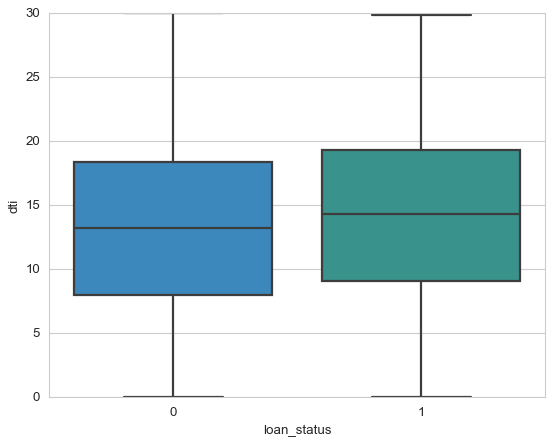

In [198]:
sn.boxplot(loan['loan_status'],loan['dti'])

In [199]:
loan['loan_status'].corr(loan['dti'])
## ONLY ABOUT 5 PERCENT CORRELATION
## NO SIGNIFICANT DIFFERENCE IN BOXPLOTS

0.045077742486232114

### Analysing effect of Revol_util on Loan Status

In [200]:
loan['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38577, dtype: object

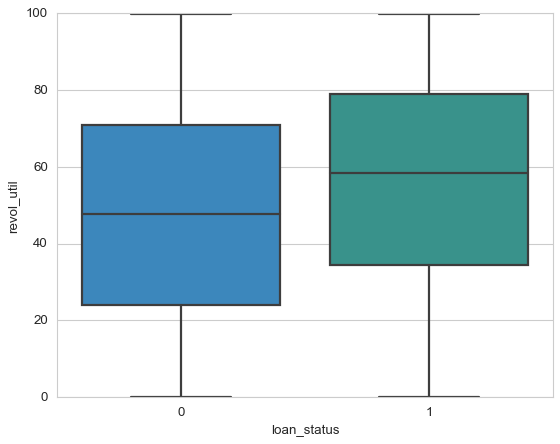

In [201]:
loan['revol_util'] = loan['revol_util'].astype(str)
loan['revol_util'] = loan['revol_util'].apply(lambda x:x.replace('%',''))
loan['revol_util']=loan['revol_util'].astype('float64')
sn.boxplot(loan['loan_status'],loan['revol_util'])

In [202]:
loan['loan_status'].corr(loan['revol_util'])
## AROUND 10 PERCENT CORRELATION
## BOX PLOT ABOVE SHOWS HIGHER VALUES/MEDIAN FOR CHARGED OFF LOANS

0.09999033261058511

## CONCLUSIONS

In [234]:
## THE PRIMARY VARIABLES FOUND TO HAVE A CORRELATION WITH LOAN_STATUS ARE 
## 1. GRADE 
## 2. SUB_GRADE
## 3. INTEREST RATE
## 4. TERM PERIOD OF LOAN 
## 5. REVOLVING UTILITY
## 6. INQUIRY IN LAST 6 MONTHS
## 7. LOAN AMOUNT
## THESE ARE THE VARIABLES TOGETHER WILL BE CONSIDERED TOWARDS BUILDING A REGRESSION MODEL 

In [235]:
## THE FACTORS WITHIN THE CATEGORICAL VARIABLES CONTRIBUTING MORE TOWARDS CHARGED OFF LOANS WERE
## 1. B GRADE MAJOR CONTRIBUTOR ACROSS YEARS
## 2. 60 MONTH TERM PERIOD OF LOAN WAS MAJOR CONTRIBUTOR IN 2011
## 3. FOR THE LOANS WITH LESSER NO. OF INQUIRIES, MORE WERE CHARGED OFF
## 4. FLORIDA AND NEW YORK WERE MAJOR CONTRIBUTORS AFTER CA, WHICH HAD A MUCH HIGHER NO. OF LOANS DISBURSED
## 5. SMALL BUSINESSES AND CREDIT CARDS WERE MAJOR CONTRIBUTOR, AFTER DEBT CONSOLIDATION WHICH HAD A MUCH HIGHER NO. OF LOANS TAKEN AGAINST
## 6. PERSONS WITH LESS THAN ONE YEAR OF EXPERIENCE AND 3 YEARS OF EXPERIENCE WERE MAJOR DEFAULTERS AFTER PERSONS WITH MORE THAN 10 YEARS OF EXPERIENCE AS THESE WERE ALSO THE CATEGORIES WHICH HAD TAKEN THE MOST NO. OF LOANS
## 7. MOST OF THE CHARGED OFF LOANS IN 2011 WERE VERIFIED BEFORE, SUGGESTING AN OVERHAUL IN THE VERIFICATION PROCESS